In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
from scipy.stats import norm
import os

In [2]:
names_hTERT = [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]

names_PDL = [
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [26]:
dataset = pd.read_csv('../Ranked/hTERT-TP4-R1-1hTERT-TP4-R1-2.tsv',sep='\t')
dataset2 = pd.read_csv('../Ranked/hTERT-TP2-R1hTERT-TP6-R1.tsv',sep='\t')
dataset.head()

,chrom,start,end,hTERT-TP4-R1-1,hTERT-TP4-R1-2,pen_dist
0,chrX,15750000,16000000,846.0,3383.0,1771.304230
1,chrX,3000000,3250000,2017.0,4397.0,1666.716302
2,chr5,171750000,172000000,597.0,2586.0,1380.736401
3,chr5,750000,1000000,2486.0,655.0,1320.511671
4,chr5,156000000,156250000,9889.0,8014.0,1308.203709


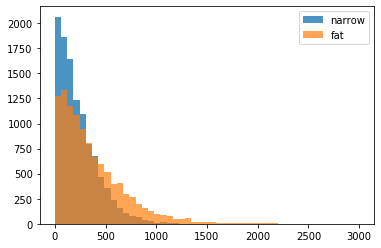

In [46]:
x=dataset['pen_dist']
y=dataset2['pen_dist']
#ax=sns.distplot(x)
bins = np.linspace(0,3000,50)
plt.hist(x,bins=bins, alpha=0.8, label='narrow')
plt.hist(y,bins=bins, alpha=0.7, label='fat')
plt.legend()

In [45]:
# how many bins are there above a given threshold ...
# we are talking here about bins that demonstrate a "flip"-like behavior - 
# a "major" change in EV1 for a pair of samples ...

my_threshold = 800

print((x>my_threshold).sum())
print((y>my_threshold).sum())

580
1056


In [43]:
# given a number of bins we are looking at - where
# the dist thershold would be ...
number_of_bins = 2000

print(x.sort_values(ascending=False).iloc[number_of_bins])
print(y.sort_values(ascending=False).iloc[number_of_bins])

508.778588371176
614.8461560327802


1001.9641062500048
997.1980014490405
1241.0271266917375
1485.1608680893276
854.4695795524408
1093.3224472526226
1276.4665054137631
1072.1406501827412
1282.8028407756344
1108.9483755013157


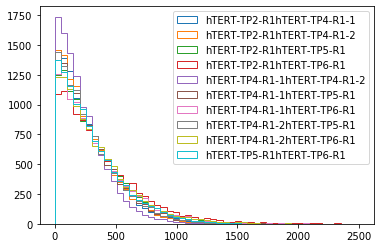

In [6]:
#hTERTS
bins = np.linspace(0,2500,50)
for i in range(5):
    for j in range(i+1,5):
        df=pd.read_csv("../Ranked/"+names_hTERT[i]+names_hTERT[j]+'.tsv',sep='\t')
        x=df['pen_dist']
        plt.hist(x,bins=bins, histtype='step', label=names_hTERT[i]+names_hTERT[j])
        print(np.percentile(x, 99))
plt.legend()

In [7]:
for i in range(5):
    for j in range(i+1,5):
        dataset = pd.read_csv("../Ranked/"+names_hTERT[i]+names_hTERT[j]+'.tsv',sep='\t')
        x=dataset[dataset.pen_dist > 800]
        x.to_csv("temp.tsv",index=False,sep='\t')
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_hTERT[i]+names_hTERT[j]+'.bed'
        os.system(cmd)

857.3948860874212
1103.4481837485248
1598.1710519061016
854.6342341563071
1353.272977913065
1296.150596979413


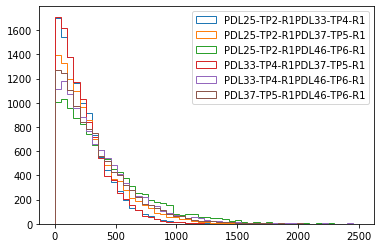

In [9]:
for i in range(4):
    for j in range(i+1,4):
        df=pd.read_csv("../Ranked/"+names_PDL[i]+names_PDL[j]+'.tsv',sep='\t')
        x=df['pen_dist']
        plt.hist(x,bins=bins, histtype='step', label=names_PDL[i]+names_PDL[j])
        print(np.percentile(x, 99))
plt.legend()

In [10]:
for i in range(4):
    for j in range(i+1,4):
        dataset = pd.read_csv("../Ranked/"+names_PDL[i]+names_PDL[j]+'.tsv',sep='\t')
        x=dataset[dataset.pen_dist > 850]
        x.to_csv("temp.tsv",index=False,sep='\t')
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_PDL[i]+names_PDL[j]+'.bed'
        os.system(cmd)

1704.787455774464
1956.1156414169195
1938.5287220678315
2252.0474441542037
2428.2083376713317
1577.2735085741906
1881.6743353960096
1845.4574633451773
2060.2012169202453
2241.5150569563593
1530.8379742623993
1791.999473784561
1771.363302785126
2032.8997611686102
2273.3100003250174
1835.5361534577946
2015.8352209732598
2005.724338204957
2136.870515959077
2236.5341359609683


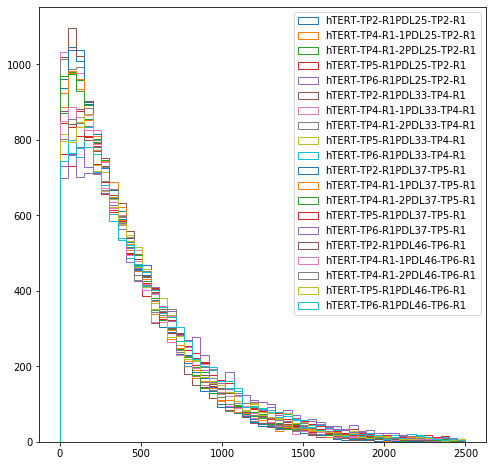

In [12]:
plt.figure(figsize=(8,8))
for i in range(4):
    for j in range(5):
        df=pd.read_csv("../Ranked/"+names_hTERT[j]+names_PDL[i]+'.tsv',sep='\t')
        x=df['pen_dist']
        plt.hist(x,bins=bins, histtype='step', label=names_hTERT[j]+names_PDL[i])
        print(np.percentile(x, 99))
plt.legend()

In [13]:
for i in range(4):
    for j in range(5):
        dataset = pd.read_csv("../Ranked/"+names_hTERT[j]+names_PDL[i]+'.tsv',sep='\t')
        x=dataset[dataset.pen_dist > 1500]
        x.to_csv("temp.tsv",index=False,sep='\t')
        cmd= 'sort -k1,1 -k2,2n -i temp.tsv | bedtools merge -d 250000 > '+names_hTERT[j]+names_PDL[i]+'.bed'
        os.system(cmd)

In [20]:
for i in range(5):
    for j in range(i+1,5):
        print(names_hTERT[i]+names_hTERT[j]+".bed ", end =" ")

hTERT-TP2-R1hTERT-TP4-R1-1.bed  hTERT-TP2-R1hTERT-TP4-R1-2.bed  hTERT-TP2-R1hTERT-TP5-R1.bed  hTERT-TP2-R1hTERT-TP6-R1.bed  hTERT-TP4-R1-1hTERT-TP4-R1-2.bed  hTERT-TP4-R1-1hTERT-TP5-R1.bed  hTERT-TP4-R1-1hTERT-TP6-R1.bed  hTERT-TP4-R1-2hTERT-TP5-R1.bed  hTERT-TP4-R1-2hTERT-TP6-R1.bed  hTERT-TP5-R1hTERT-TP6-R1.bed  

In [21]:
for i in range(4):
    for j in range(i+1,4):
        print(names_PDL[i]+names_PDL[j]+".bed ", end =" ")

PDL25-TP2-R1PDL33-TP4-R1.bed  PDL25-TP2-R1PDL37-TP5-R1.bed  PDL25-TP2-R1PDL46-TP6-R1.bed  PDL33-TP4-R1PDL37-TP5-R1.bed  PDL33-TP4-R1PDL46-TP6-R1.bed  PDL37-TP5-R1PDL46-TP6-R1.bed  

In [23]:
for i in range(4):
    for j in range(5):
        print(names_hTERT[j]+names_PDL[i]+".bed ", end =" ")

hTERT-TP2-R1PDL25-TP2-R1.bed  hTERT-TP4-R1-1PDL25-TP2-R1.bed  hTERT-TP4-R1-2PDL25-TP2-R1.bed  hTERT-TP5-R1PDL25-TP2-R1.bed  hTERT-TP6-R1PDL25-TP2-R1.bed  hTERT-TP2-R1PDL33-TP4-R1.bed  hTERT-TP4-R1-1PDL33-TP4-R1.bed  hTERT-TP4-R1-2PDL33-TP4-R1.bed  hTERT-TP5-R1PDL33-TP4-R1.bed  hTERT-TP6-R1PDL33-TP4-R1.bed  hTERT-TP2-R1PDL37-TP5-R1.bed  hTERT-TP4-R1-1PDL37-TP5-R1.bed  hTERT-TP4-R1-2PDL37-TP5-R1.bed  hTERT-TP5-R1PDL37-TP5-R1.bed  hTERT-TP6-R1PDL37-TP5-R1.bed  hTERT-TP2-R1PDL46-TP6-R1.bed  hTERT-TP4-R1-1PDL46-TP6-R1.bed  hTERT-TP4-R1-2PDL46-TP6-R1.bed  hTERT-TP5-R1PDL46-TP6-R1.bed  hTERT-TP6-R1PDL46-TP6-R1.bed  

cat PDL25-TP2-R1PDL33-TP4-R1.bed  PDL25-TP2-R1PDL37-TP5-R1.bed  PDL25-TP2-R1PDL46-TP6-R1.bed  PDL33-TP4-R1PDL37-TP5-R1.bed  PDL33-TP4-R1PDL46-TP6-R1.bed  PDL37-TP5-R1PDL46-TP6-R1.bed  | sort -k1,1 -k2,2n | bedtools merge -d 250000 > merged-PDLs.bed